## Decision Tree - Combined

In [3]:
# import required package for data handling
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import the packages needed for the Decision Tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree
import matplotlib.pyplot as plt

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
# read in the csv
df = pd.read_csv('../csv_files/Model_Ready_Classification.csv',index_col=0)
df.head(2)

,H_FTPct,H_EFGPct,H_ThreePARt,H_FTR,H_REBPct,H_BLKPct,H_AST_TOV_Ratio,A_FTPct,A_EFGPct,A_ThreePARt,A_FTR,A_REBPct,A_BLKPct,A_AST_TOV_Ratio,Target
0,0.833,0.461538,0.395604,0.329670,0.506173,0.036585,1.785714,0.952,0.628049,0.463415,0.256098,0.493827,0.109890,2.142857,0
1,0.885,0.430851,0.404255,0.276596,0.538462,0.024390,1.133333,0.870,0.542683,0.414634,0.280488,0.461538,0.053191,2.266667,0


In [5]:
# Splitting up our data into variable and target data
X = df.iloc[:, :-1] # Variable
Y = df.Target # Target

In [6]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4, max_features=14, criterion='gini', splitter='best', random_state=2019)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [11]:
# Model Accuracy, how often is the Decision Tree correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

Accuracy: 0.8070366340224883
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1135
           1       0.82      0.87      0.84      1622

    accuracy                           0.81      2757
   macro avg       0.80      0.79      0.80      2757
weighted avg       0.81      0.81      0.81      2757

[[ 818  317]
 [ 215 1407]]


In [12]:
# Calculating accuracy, F1 score, and AUC 
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred))
print('F1_Score:', metrics.f1_score(Y_test, Y_pred, average='weighted'))
print('AUC:', metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

Accuracy: 0.8070366340224883
F1_Score: 0.8054385297291539
AUC: 0.7940762206880069


In [13]:
# Displaying the feature importance
# define the feature importance variable 
# use the feature importance values from the decision tree above, sort in descending order 
feature_imp = pd.Series(clf.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
feature_imp

A_EFGPct           0.476223
H_EFGPct           0.459482
A_AST_TOV_Ratio    0.042697
A_REBPct           0.011564
H_AST_TOV_Ratio    0.010034
A_BLKPct           0.000000
A_FTR              0.000000
A_ThreePARt        0.000000
A_FTPct            0.000000
H_BLKPct           0.000000
H_REBPct           0.000000
H_FTR              0.000000
H_ThreePARt        0.000000
H_FTPct            0.000000
dtype: float64

In [39]:
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus

#dot_data = StringIO()

#export_graphviz(clf, out_file=dot_data,  
 #               filled=True, rounded=True,
  #              special_characters=True)

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

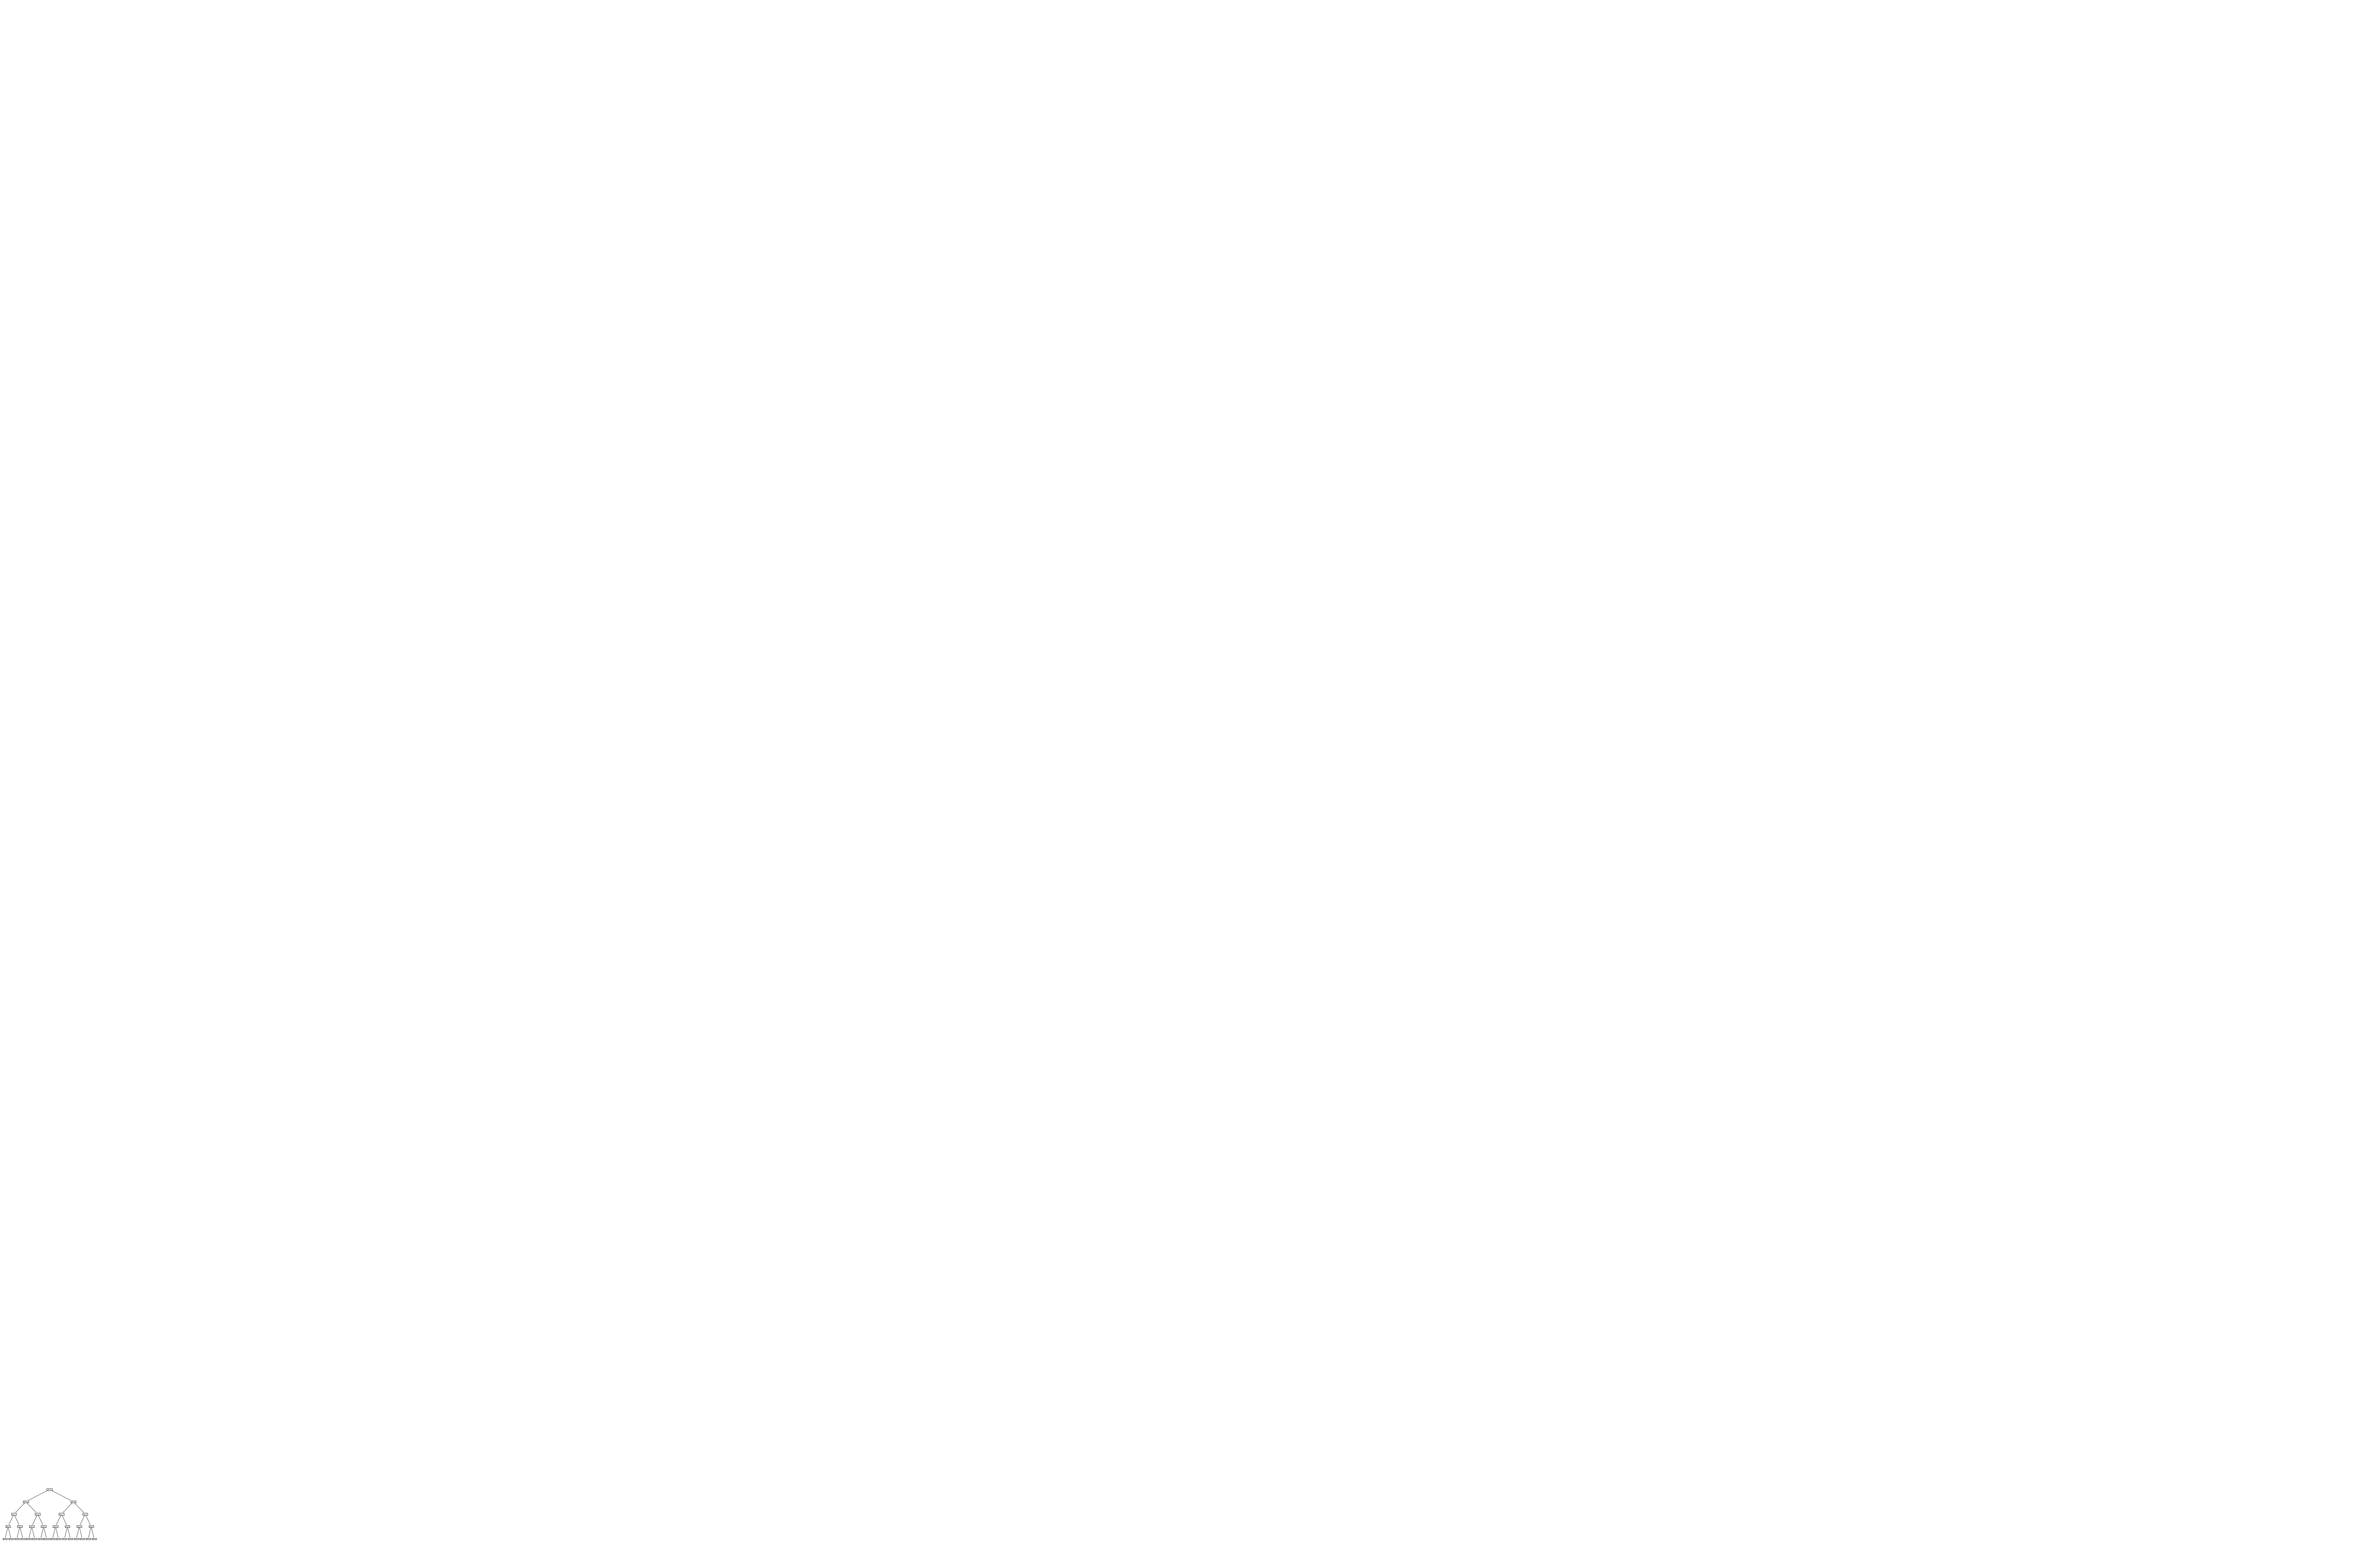

In [41]:
from sklearn import tree
tree.plot_tree(clf)
fig = plt.gcf()
fig.set_size_inches(150,100)
fig.savefig('tree_Combined.pdf', clear=True, quality=100)

In [47]:
X.iloc[:, 1]

0       1.785714
1       1.133333
2       2.500000
3       2.000000
4       2.363636
5       2.909091
6       2.583333
7       1.647059
8       2.000000
9       3.857143
10      1.875000
11      1.750000
12      2.142857
13      3.000000
14      1.500000
15      1.400000
16      1.500000
17      2.000000
18      1.866667
19      1.687500
20      3.250000
21      2.200000
22      2.500000
23      1.384615
24      1.833333
25      1.285714
26      1.538462
27      1.411765
28      1.769231
29      2.230769
          ...   
9160    3.250000
9161    1.055556
9162    1.176471
9163    2.133333
9164    1.333333
9165    2.250000
9166    1.352941
9167    1.166667
9168    2.181818
9169    1.800000
9170    1.250000
9171    1.500000
9172    1.769231
9173    1.222222
9174    1.545455
9175    0.750000
9176    1.916667
9177    2.076923
9178    2.000000
9179    1.800000
9180    1.136364
9181    1.714286
9182    1.166667
9183    1.200000
9184    1.312500
9185    1.583333
9186    0.888889
9187    3.1250

In [54]:
df.count()

H_FTPct            9844
H_EFGPct           9844
H_ThreePARt        9844
H_FTR              9844
H_REBPct           9844
H_BLKPct           9844
H_AST_TOV_Ratio    9844
A_FTPct            9844
A_EFGPct           9844
A_ThreePARt        9844
A_FTR              9844
A_REBPct           9844
A_BLKPct           9844
A_AST_TOV_Ratio    9844
Target             9844
dtype: int64